# Basic usage

Welcome to the basic usage notebook of pySWAP package. Here we will go through the basics of how a SWAP model is constructed in pySWAP, load one of the test case models and explore it a bit.

In [1]:
import pyswap as ps
from pyswap import testcase

pySWAP is an object-oriented library, which means that we try to split and encapsulate distinct parts of the SWAP model setup as objects. These objects need to be defined by the user at the initial stage and then can later be easily manipulated, copied and compared. Below is an example of the Meteorological settings object:

## Hupselbrook testcase

A lot of the model settings still need to be explicitly written out. There is, however, an ongoing effort to reduce to minimum the amount of code that has to be written for the initial model. If you are interested how the Hupselbrook model is implemented in pySWAP, take a look at file `hupselbrook.py` in `testcase` module.

Let's load the model and check the metadata.

In [2]:
ml = testcase.get("hupselbrook")

`Model` object has a method run, which runs the model and captures the results into a `Result` object. The only argument that needs to be passed is the path to where the temporary directory can be created.

In [3]:
result = ml.run('./')

INFO: Copying linux executable into temporary directory...
INFO: Preparing files...


dra file saved.
3 crop file(s) saved.
283.met saved.


INFO: 
 running swap ....
Swap normal completion!



From now on, we can use Result object's attributes and computed fields to access the results. The .csv, for example, is already loaded as DataFrame.

In [4]:
result.output.keys()

dict_keys(['csv', 'vap', 'blc', 'inc'])

In [5]:
result.yearly_summary()

,RAIN,IRRIG,INTERC,RUNOFF,EPOT,EACT,DRAINAGE,QBOTTOM,GWL,TPOT,TACT,DSTOR
DATETIME,,,,,,,,,,,,
2002-12-31,84.18,0.5,3.74188,0.0,33.10679,16.68715,22.11357,0.0,-1107.65824,38.71198,38.17328,3.96418
2003-12-31,71.98,0.0,2.05788,0.0,35.99241,17.17961,26.44815,0.0,-1154.37603,29.41787,29.21504,-2.92064
2004-12-31,80.55,0.0,4.91521,0.0,29.89227,17.88916,24.76607,0.0,-1036.76085,32.57266,32.56927,0.41030


In [6]:
print(result.blc_summary)

* Project:       pySWAP test - hupselbrook
* File content:  detailed overview of water balance components (cm)
* File name:     ./result.blc
* Model version: Swap 4.2.0
* Generated at:  2024-11-26 17:54:02

Period             :  2002-01-01  until  2002-12-31 
Depth soil profile :  200.00 cm
=================================================+=================================================
INPUT                                            | OUTPUT
                   PLANT    SNOW    POND    SOIL |                   PLANT    SNOW    POND    SOIL
=================================================+=================================================
Initially Present           0.00    0.00   71.60 | Finally present            0.00    0.00   75.56
Gross Rainfall     84.18                         |
Nett Rainfall               0.00   80.44         | Nett Rainfall     80.44
Gross Irrigation    0.50                         |
Nett Irrigation                     0.50         | Nett Irrigation    0.50


<Axes: xlabel='DATETIME'>

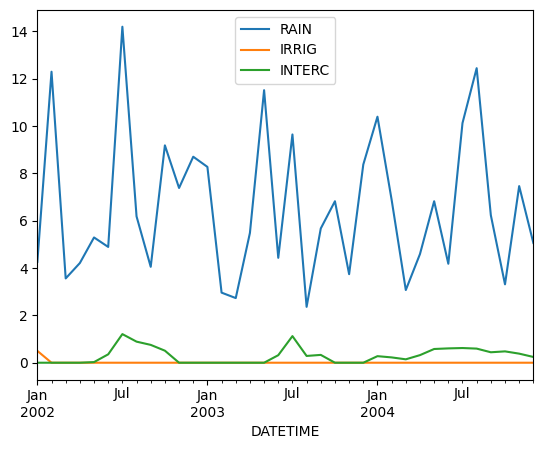

In [7]:
result.csv[["RAIN", "IRRIG", "INTERC"]].plot()

## Changing the model settings

Assume you would like to add another file extension to be generated, or make any other change for that matter. The best way to achieve this is to create a copy of a component you want to alter, and then update the model with that new component, saving it's copy.

In [8]:
# updated general settings including inlist_csv_tz
generalsettings_csv_tz = ml.general_settings.model_copy(deep=True)

In [9]:
print(generalsettings_csv_tz.model_string())

PATHWORK = './'
PATHATM = './'
PATHCROP = './'
PATHDRAIN = './'
SWSCRE = 0
SWERROR = 1
TSTART = 2002-01-01
TEND = 2004-12-31
NPRINTDAY = 1
SWMONTH = 1
SWYRVAR = 0
DATEFIX = 31 12
OUTFIL = 'result'
SWHEADER = 0
INLIST_CSV = 'rain,irrig,interc,runoff,drainage,dstor,epot,eact,tpot,tact,qbottom,gwl'
SWAFO = 0
SWAUN = 0
SWDISCRVERT = 0
SWWBA = 0
SWEND = 0
SWVAP = 1
SWBAL = 0
SWBLC = 1
SWSBA = 1
SWATE = 0
SWBMA = 0
SWDRF = 0
SWSWB = 0
SWINI = 0
SWINC = 1
SWCRP = 0
SWSTR = 0
SWIRG = 0
SWCSV = 1
SWCSV_TZ = 0



In [17]:
generalsettings_csv_tz.add_extension("csv_tz", inlist=["WC", "H"])

GeneralSettings(name='generalsettings', extensions=['vap', 'blc', 'sba', 'inc', 'csv', 'csv_tz'], pathwork='./', pathatm='./', pathcrop='./', pathdrain='./', swscre=0, swerror=1, tstart=datetime.date(2002, 1, 1), tend=datetime.date(2004, 12, 31), nprintday=1, swmonth=1, swyrvar=0, period=None, swres=None, swodat=None, outdatin=None, datefix=datetime.date(2004, 12, 31), outdat=None, outfil='result', swheader=0, inlist_csv=['rain', 'irrig', 'interc', 'runoff', 'drainage', 'dstor', 'epot', 'eact', 'tpot', 'tact', 'qbottom', 'gwl'], inlist_csv_tz=['WC', 'H'], swafo=0, swaun=0, critdevmasbal=None, swdiscrvert=0, numnodnew=None, dznew=None, swwba=0, swend=0, swvap=1, swbal=0, swblc=1, swsba=1, swate=0, swbma=0, swdrf=0, swswb=0, swini=0, swinc=1, swcrp=0, swstr=0, swirg=0, swcsv=1, swcsv_tz=1)

In [18]:
print(generalsettings_csv_tz.model_string())

PATHWORK = './'
PATHATM = './'
PATHCROP = './'
PATHDRAIN = './'
SWSCRE = 0
SWERROR = 1
TSTART = 2002-01-01
TEND = 2004-12-31
NPRINTDAY = 1
SWMONTH = 1
SWYRVAR = 0
DATEFIX = 31 12
OUTFIL = 'result'
SWHEADER = 0
INLIST_CSV = 'rain,irrig,interc,runoff,drainage,dstor,epot,eact,tpot,tact,qbottom,gwl'
INLIST_CSV_TZ = 'WC,H'
SWAFO = 0
SWAUN = 0
SWDISCRVERT = 0
SWWBA = 0
SWEND = 0
SWVAP = 1
SWBAL = 0
SWBLC = 1
SWSBA = 1
SWATE = 0
SWBMA = 0
SWDRF = 0
SWSWB = 0
SWINI = 0
SWINC = 1
SWCRP = 0
SWSTR = 0
SWIRG = 0
SWCSV = 1
SWCSV_TZ = 1



In [19]:
ml2 = ml.model_copy(update={
    "general_settings": generalsettings_csv_tz
})

In [20]:
result2 = ml2.run("./")

INFO: Copying linux executable into temporary directory...
INFO: Preparing files...


dra file saved.
3 crop file(s) saved.
283.met saved.


INFO: 
 running swap ....
Swap normal completion!



In [21]:
result2.output.keys()

dict_keys(['csv', 'csv_tz', 'vap', 'blc', 'inc'])

In [22]:
print(result.csv_tz)  # this will be empty
print(result2.csv_tz)  # this will show a DataFrame with the WC and H columns

None
            DEPTH         H        WC
DATE                                 
2002-01-31   -0.5  -58.4187  0.294339
2002-01-31   -1.5  -57.7861  0.295358
2002-01-31   -2.5  -57.1407  0.296407
2002-01-31   -3.5  -56.4827  0.297487
2002-01-31   -4.5  -55.8122  0.298598
...           ...       ...       ...
2004-12-31 -155.0   87.4625  0.380000
2004-12-31 -165.0   97.4150  0.380000
2004-12-31 -175.0  107.3790  0.380000
2004-12-31 -185.0  117.3560  0.380000
2004-12-31 -195.0  127.3440  0.380000

[1224 rows x 3 columns]


## Alternative way to setup the model

Initially it was only possible to directly assign generated model components to the Model object attributes. Since the newest release (November 2024) it is possible to set up and run the model by adding the individual 